<a href="https://colab.research.google.com/github/Tanatinho/1/blob/main/_16_ai_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ТЕМА: ПРОГНОЗ СТОИМОСТИ БАЗОВОГО ДОМОКОМПЛЕКТА ДЕРЕВЯННОГО СТРОЕНИЯ**

> БАЗА ДАННЫХ ВКЛЮЧАЕТ В СЕБЯ 467 РЕАЛЬНЫХ ПРОЕКТОВ.

**ИМЕЮЩИЕСЯ ДАННЫЕ:**
- Projects - **номер проекта**
- House type - **тип дома**
- length - **длина строения**
- Width - **ширина строения**
- Floor area - **площадь этажей**
- Number of storeys - **количество этажей**
- Ground floor height - **высота первого этажа**
- Attic type - **тип чердака**
- Number of rooms - **количество комнат**
- Double bar percentage - **процент двойного бруса**
- Roof type - **тип крыши**
- Roof slope angle - **угол наклона крыши**
- Area of window openings - **площадь оконных проемов**
- Veranda area - **площадь веранды**

**ПРЕДСКАЗЫВАЕМ:**
- Kit price - **стоимость домокомплекта**

## **1. ИМПОРТ НЕОБХОДИМЫХ БИБЛИОТЕК И ЗАГРУЗКА ДАННЫХ**

In [ ]:
#@title Импорт библиотек
!pip install autokeras
import warnings
import numpy as np
import pandas as pd
import gdown
import autokeras as ak
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets
clear_output()

Загружаем данные

In [ ]:
df = pd.read_csv('/content/HouseProjectsNew.csv')
df

,Projects,House type,Kit price,Length,Width,Floor area,Number of storeys,Ground floor height,Attic type,Number of rooms,Double bar percentage,Roof type,Roof slope angle,Area of window openings,Veranda area
0,Project 1,Баня,595,6.24,5.14,26.0,1,2.43,Отсутствует,2,0,Двускатная,Маленький,3.3,17.60
1,Project 2,Баня,1117,14.30,3.28,39.5,1,2.57,Отсутствует,3,60,Двускатная,Большой,12.7,21.08
2,Project 3,Баня,191,5.04,2.34,11.0,1,2.09,Отсутствует,3,0,Двускатная,Средний,0.5,0.00
3,Project 4,Баня,197,5.04,2.54,12.0,1,2.43,Отсутствует,2,0,Двускатная,Средний,1.5,0.00
4,Project 5,Баня,217,2.54,5.04,12.0,1,2.37,Отсутствует,2,0,Двускатная,Средний,1.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Project 463,Баня,46,1.55,1.25,1.5,1,1.42,Отсутствует,1,0,Двускатная,Средний,0.9,0.00
463,Project 464,Баня,58,1.35,1.55,2.0,1,1.56,Отсутствует,1,0,Двускатная,Средний,0.6,0.80
464,Project 465,Баня,40,1.50,1.50,2.0,1,1.56,Отсутствует,1,0,Двускатная,Средний,0.3,0.00
465,Project 466,Баня,341,5.80,4.80,23.0,1,1.63,Отсутствует,6,0,Двускатная,Маленький,0.8,0.00


## **2. АНАЛИЗ ДАННЫХ**

Количество пустых значений в каждом столбце

In [ ]:
empty_cells = df.isnull().sum()
empty_cells

Projects                   0
House type                 0
Kit price                  0
Length                     0
Width                      0
Floor area                 0
Number of storeys          0
Ground floor height        0
Attic type                 0
Number of rooms            0
Double bar percentage      0
Roof type                  0
Roof slope angle           0
Area of window openings    0
Veranda area               0
dtype: int64

Количество нулевых значений в каждом столбце

In [ ]:
zero_counts = (df == 0).sum()
zero_counts

Projects                     0
House type                   0
Kit price                    0
Length                       0
Width                        0
Floor area                   0
Number of storeys            0
Ground floor height          0
Attic type                   0
Number of rooms              0
Double bar percentage      144
Roof type                    0
Roof slope angle             0
Area of window openings     22
Veranda area               233
dtype: int64

Количество уникальных значений в каждом столбце

In [ ]:
unique_value_counts = df.nunique()
unique_value_counts

Projects                   467
House type                   3
Kit price                  421
Length                     213
Width                      199
Floor area                 235
Number of storeys            2
Ground floor height         41
Attic type                   3
Number of rooms             27
Double bar percentage       14
Roof type                    4
Roof slope angle             3
Area of window openings    239
Veranda area               162
dtype: int64

Типы строений (House type)

In [ ]:
unique_house_types = df['House type'].unique()
unique_house_types

array(['Баня', 'Дом', 'Беседка'], dtype=object)

Типы чердаков (Attic type)

In [ ]:
unique_attic_types = df['Attic type'].unique()
unique_attic_types

array(['Отсутствует', 'Поднятая', 'Неподнятая'], dtype=object)

Количество этажей (Number of storeys)

In [ ]:
unique_number_of_storeys = df['Number of storeys'].unique()
unique_number_of_storeys

array([1, 2])

Количество комнат (Number of rooms)

In [ ]:
unique_number_of_rooms = df['Number of rooms'].unique()
unique_number_of_rooms

array([ 2,  3,  4,  7,  1,  6,  8,  5,  9, 11, 18, 22, 13, 19, 25, 12, 10,
       15, 24, 14, 28, 27, 16, 17, 23, 20, 30])

Тип крыши (Roof type)

In [ ]:
unique_roof_types = df['Roof type'].unique()
unique_roof_types

array(['Двускатная', 'Односкатная', 'Вальмовая', 'Сложная'], dtype=object)

Угол наклона крыши (Roof slope angle)

In [ ]:
unique_roof_slope_angles = df['Roof slope angle'].unique()
unique_roof_slope_angles

array(['Маленький', 'Большой', 'Средний'], dtype=object)

Гистограмма распределения площади этажей (Floor area)

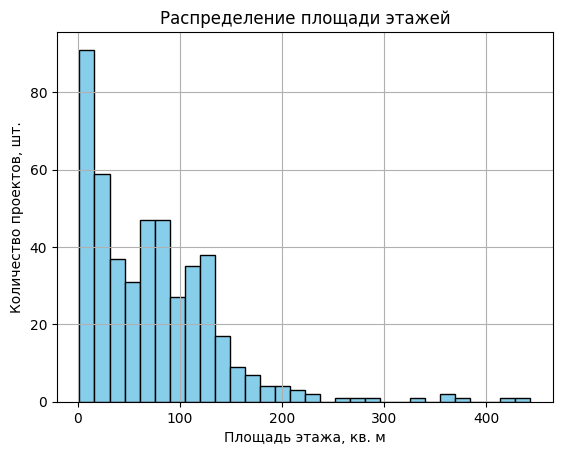

In [ ]:
plt.hist(df['Floor area'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Площадь этажа, кв. м')
plt.ylabel('Количество проектов, шт.')
plt.title('Распределение площади этажей')
plt.grid(True)
plt.show()

Гистограмма распределения высоты первого этажа (Ground floor height)

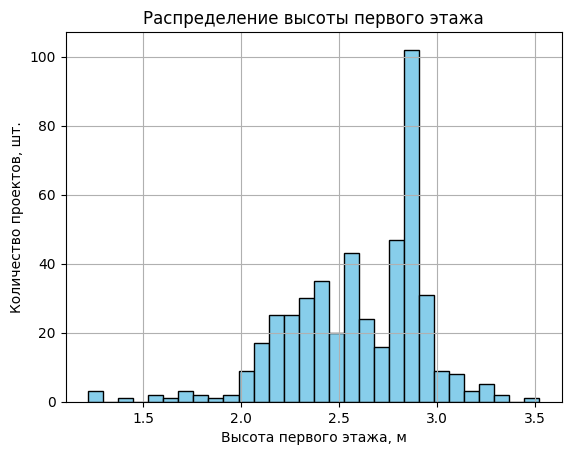

In [ ]:
plt.hist(df['Ground floor height'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Высота первого этажа, м')
plt.ylabel('Количество проектов, шт.')
plt.title('Распределение высоты первого этажа')
plt.grid(True)
plt.show()

Гистограмма распределения площади веранды (Veranda area)

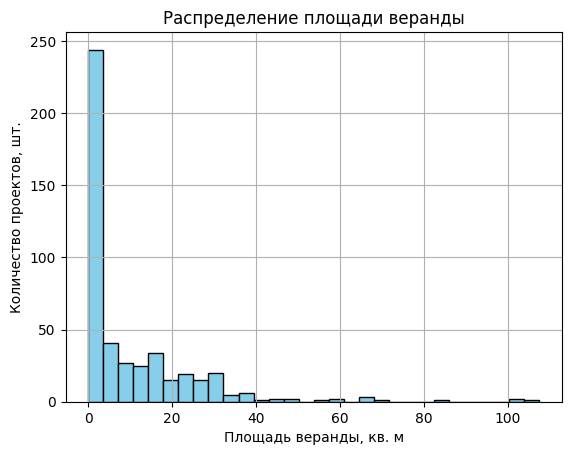

In [ ]:
plt.hist(df['Veranda area'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Площадь веранды, кв. м')
plt.ylabel('Количество проектов, шт.')
plt.title('Распределение площади веранды')
plt.grid(True)
plt.show()

Гистограмма распределения площади оконных проемов (Area of window openings)

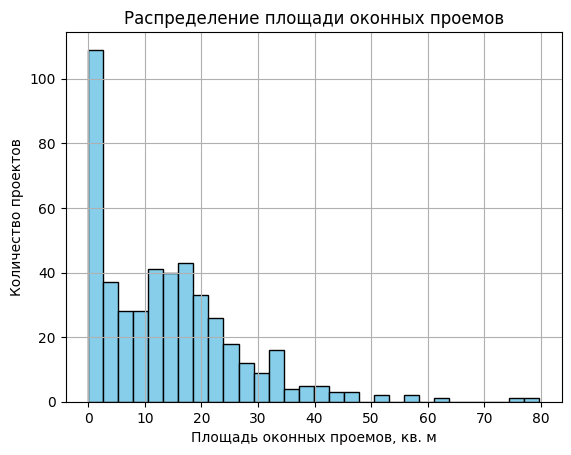

In [ ]:
plt.hist(df['Area of window openings'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Площадь оконных проемов, кв. м')
plt.ylabel('Количество проектов')
plt.title('Распределение площади оконных проемов')
plt.grid(True)
plt.show()

Гистограмма распределения стоимости комплекта (Kit price)

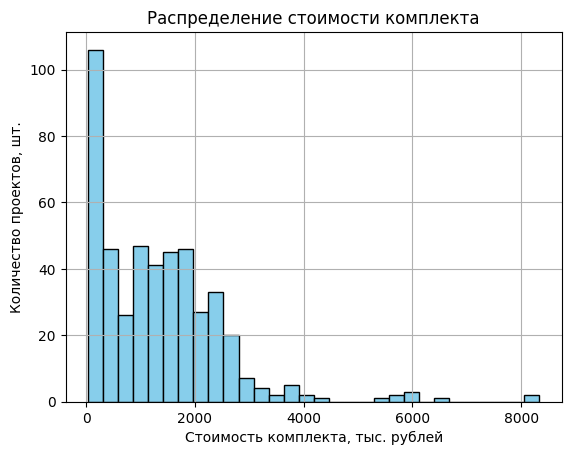

In [ ]:
plt.hist(df['Kit price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Стоимость комплекта, тыс. рублей')
plt.ylabel('Количество проектов, шт.')
plt.title('Распределение стоимости комплекта')
plt.grid(True)
plt.show()

In [ ]:
#@title Функция отрисовки тепловой карты
def plot_correlation_heatmap(df, target_column):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    correlation = df[numeric_columns].corr().sort_values(by=target_column, ascending=False)
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Тепловая карта зависимости числовых столбцов от {target_column}')
    plt.show()

Тепловая карта зависимости значений всех столбцов от целевого столбца 'Kit price'

**вход:**
- df - исходная таблица
- target_column='Kit price' - целевой столбец с ценой домокомплекта

**выход:**
- визуализированные данные

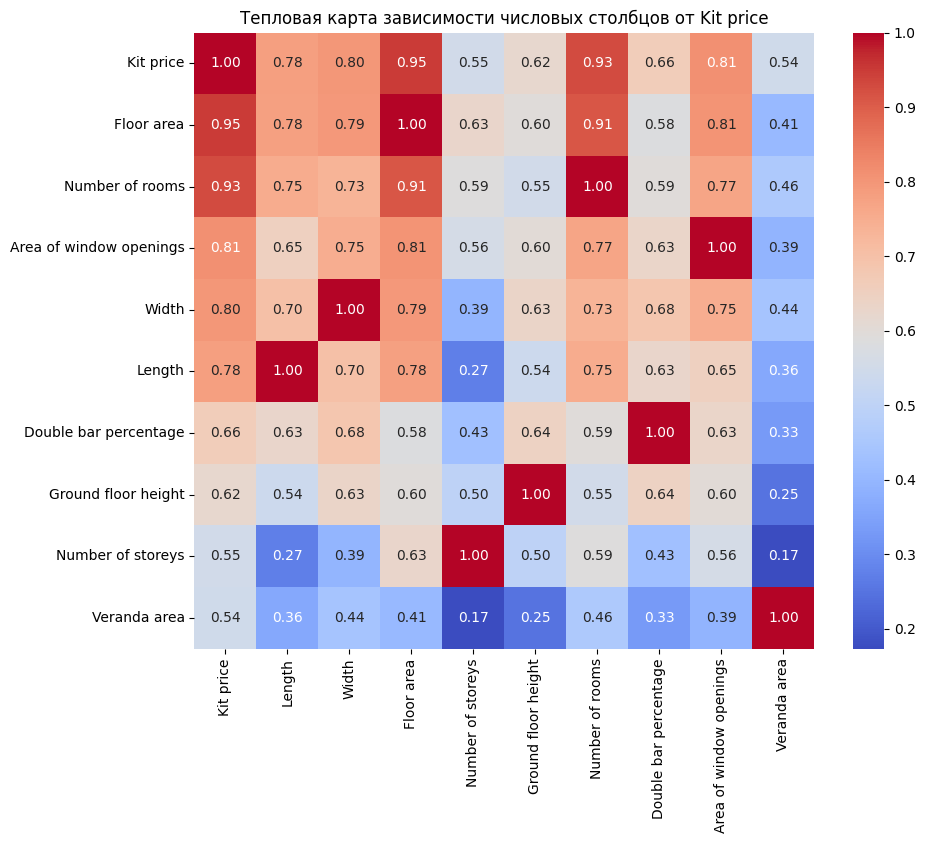

In [ ]:
plot_correlation_heatmap(df, target_column='Kit price')

## **3. ПРЕДОБРАБОТКА ДАННЫХ**

In [ ]:
#@title Функция выбора столбцов
def select_columns(df):
    normalized = False
    while True:
        # Удаляем столбец 'Kit price'
        df_without_kit_price = df.drop(columns=['Kit price'])

        # Пронумерованный список оставшихся столбцов
        columns_list = [(i, col) for i, col in enumerate(df_without_kit_price.columns)]

        # Вывод списка столбцов с их номерами
        print("Список столбцов:")
        for col_num, col_name in columns_list:
            print(f"{col_num}. {col_name}")

        # Запрос пользователю выбрать столбцы для анализа
        selected_nums = input("Введите номера столбцов через пробел (хотя бы один): ").split(" ")
        selected_nums = [int(num.strip()) for num in selected_nums if num.strip().isdigit()]

        # Проверка выбранных столбцов
        selected_columns = []
        for num in selected_nums:
            if num < 0 or num >= len(columns_list):
                continue
            selected_columns.append(columns_list[num][1])

        if len(selected_columns) < 1:
            print("Ни один столбец не выбран, повторите выбор.")
            continue  # Возвращаемся в начало цикла

        # Добавление столбца 'Kit price' в конец списка выбранных столбцов
        selected_columns.append('Kit price')

        # Создание нового DataFrame с выбранными столбцами
        new_df = df[selected_columns]

        return new_df, normalized

Выбираем столбцы для проведения экспериментов (Kit price - целевой столбец автоматически добавится в конец новой  таблицы):

**вход:**
- df - исходная таблица

**выход:**
- new_df - новая таблица
- normalized - параметр нормализации = Fаlse

In [ ]:
new_df, normalized = select_columns(df)
new_df

Список столбцов:
0. Projects
1. House type
2. Length
3. Width
4. Floor area
5. Number of storeys
6. Ground floor height
7. Attic type
8. Number of rooms
9. Double bar percentage
10. Roof type
11. Roof slope angle
12. Area of window openings
13. Veranda area
Введите номера столбцов через пробел (хотя бы один): 1 2 3 4 5 6 7 8 9 10 11 12 13


,House type,Length,Width,Floor area,Number of storeys,Ground floor height,Attic type,Number of rooms,Double bar percentage,Roof type,Roof slope angle,Area of window openings,Veranda area,Kit price
0,Баня,6.24,5.14,26.0,1,2.43,Отсутствует,2,0,Двускатная,Маленький,3.3,17.60,595
1,Баня,14.30,3.28,39.5,1,2.57,Отсутствует,3,60,Двускатная,Большой,12.7,21.08,1117
2,Баня,5.04,2.34,11.0,1,2.09,Отсутствует,3,0,Двускатная,Средний,0.5,0.00,191
3,Баня,5.04,2.54,12.0,1,2.43,Отсутствует,2,0,Двускатная,Средний,1.5,0.00,197
4,Баня,2.54,5.04,12.0,1,2.37,Отсутствует,2,0,Двускатная,Средний,1.5,0.00,217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Баня,1.55,1.25,1.5,1,1.42,Отсутствует,1,0,Двускатная,Средний,0.9,0.00,46
463,Баня,1.35,1.55,2.0,1,1.56,Отсутствует,1,0,Двускатная,Средний,0.6,0.80,58
464,Баня,1.50,1.50,2.0,1,1.56,Отсутствует,1,0,Двускатная,Средний,0.3,0.00,40
465,Баня,5.80,4.80,23.0,1,1.63,Отсутствует,6,0,Двускатная,Маленький,0.8,0.00,341


In [ ]:
#@title Функция перевода текстовых данных в числовые категориальные метки
def encode_categorical(df, labelData):
    # Проверка наличия столбцов из labelData в DataFrame
    existing_columns = [col for col in labelData if col in df.columns]
    if not existing_columns:
        print("В таблице нет текстовых столбцов.")
        return df

    # Копирование DataFrame, чтобы избежать изменений в оригинальном DataFrame
    df_encoded = df.copy()

    # Кодирование категориальных столбцов
    encoder = LabelEncoder()
    for column in existing_columns:
        df_encoded[column] = encoder.fit_transform(df_encoded[column])

    return df_encoded

Переводим текстовые данные в числовые категориальные метки (обязательно при наличии текстовых столбцов):

**вход:**
- new_df - новая таблица

- ['Projects', 'House type', 'Attic type', 'Roof type', 'Roof slope angle'] - перечень текстовых столбцов

**выход:**
- new_df - новая таблица без текстовых данных

In [ ]:
new_df = encode_categorical(new_df, ['Projects', 'House type', 'Attic type', 'Roof type', 'Roof slope angle'])
new_df

,House type,Length,Width,Floor area,Number of storeys,Ground floor height,Attic type,Number of rooms,Double bar percentage,Roof type,Roof slope angle,Area of window openings,Veranda area,Kit price
0,0,6.24,5.14,26.0,1,2.43,1,2,0,1,1,3.3,17.60,595
1,0,14.30,3.28,39.5,1,2.57,1,3,60,1,0,12.7,21.08,1117
2,0,5.04,2.34,11.0,1,2.09,1,3,0,1,2,0.5,0.00,191
3,0,5.04,2.54,12.0,1,2.43,1,2,0,1,2,1.5,0.00,197
4,0,2.54,5.04,12.0,1,2.37,1,2,0,1,2,1.5,0.00,217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,0,1.55,1.25,1.5,1,1.42,1,1,0,1,2,0.9,0.00,46
463,0,1.35,1.55,2.0,1,1.56,1,1,0,1,2,0.6,0.80,58
464,0,1.50,1.50,2.0,1,1.56,1,1,0,1,2,0.3,0.00,40
465,0,5.80,4.80,23.0,1,1.63,1,6,0,1,1,0.8,0.00,341


In [ ]:
#@title Функция нормализации данных
def normalize_dataframe(df, normalized):
    # Копирование DataFrame, чтобы избежать изменений в оригинальном DataFrame
    df_normalized = df.copy()

    # Нормирование всех числовых столбцов
    numeric_cols = df_normalized.select_dtypes(include=['float64', 'int64']).columns.drop("Kit price")
    scaler = MinMaxScaler(feature_range=(0, 1))
    df_normalized[numeric_cols] = scaler.fit_transform(df_normalized[numeric_cols])

    # Нормирование целевого значения 'Kit price'
    scaler_price = MinMaxScaler(feature_range=(0, 1))
    df_normalized['Kit price'] = scaler_price.fit_transform(df_normalized[['Kit price']])
    normalized = True

    return df_normalized, scaler_price, normalized

Нормализация данных всех столбцов в диапазон от 0 до 1 (не обязательно):

**вход:**
- new_df - новая таблица
- normalized - параметр нормализации = False

**выход:**
- new_df - нормированная новая таблица
- scaler_price - преобразователь цены (нужен будет при оценке тестовых данных)
- normalized - параметр нормализации = True

In [ ]:
new_df, scaler_price, normalized = normalize_dataframe(new_df, normalized)
new_df

,House type,Length,Width,Floor area,Number of storeys,Ground floor height,Attic type,Number of rooms,Double bar percentage,Roof type,Roof slope angle,Area of window openings,Veranda area,Kit price
0,0.0,0.172945,0.240361,0.055430,0.0,0.526087,0.5,0.034483,0.0,0.333333,0.5,0.041405,0.163721,0.067181
1,0.0,0.448973,0.128313,0.085973,0.0,0.586957,0.5,0.068966,0.6,0.333333,0.0,0.159348,0.196093,0.130141
2,0.0,0.131849,0.071687,0.021493,0.0,0.378261,0.5,0.068966,0.0,0.333333,1.0,0.006274,0.000000,0.018454
3,0.0,0.131849,0.083735,0.023756,0.0,0.526087,0.5,0.034483,0.0,0.333333,1.0,0.018821,0.000000,0.019177
4,0.0,0.046233,0.234337,0.023756,0.0,0.500000,0.5,0.034483,0.0,0.333333,1.0,0.018821,0.000000,0.021590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,0.0,0.012329,0.006024,0.000000,0.0,0.086957,0.5,0.000000,0.0,0.333333,1.0,0.011292,0.000000,0.000965
463,0.0,0.005479,0.024096,0.001131,0.0,0.147826,0.5,0.000000,0.0,0.333333,1.0,0.007528,0.007442,0.002412
464,0.0,0.010616,0.021084,0.001131,0.0,0.147826,0.5,0.000000,0.0,0.333333,1.0,0.003764,0.000000,0.000241
465,0.0,0.157877,0.219880,0.048643,0.0,0.178261,0.5,0.172414,0.0,0.333333,0.5,0.010038,0.000000,0.036546


## **4. РАЗДЕЛЕНИЕ ДАННЫХ НА ОБУЧАЮЩУЮ, ПРОВЕРОЧНУЮ И ТЕСТОВУЮ ВЫБОРКИ**

In [ ]:
#@title Функция разделения данных
def split_data(df):
    # Запрос размера проверочной выборки у пользователя
    val_percent = input("Введите % проверочной выборки (от 1 до 99): ")
    try:
        val_percent = float(val_percent)
        if val_percent < 1 or val_percent > 99:
            print("Процентный размер проверочной выборки должен быть в диапазоне от 1 до 99.")
            return None, None, None, None
    except ValueError:
        print("Некорректный ввод. Размер проверочной выборки должен быть числом от 1 до 99.")
        return None, None, None, None

    # Преобразование процентного размера в долю от общего количества данных
    val_size = val_percent / 100

    # Разделение данных на обучающую, проверочную и тестовую выборки
    X_train_val, X_test, y_train_val, y_test = train_test_split(df.drop(columns=['Kit price']), df['Kit price'], test_size=0.1, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_size, random_state=42)

    # Преобразование в массивы NumPy
    X_train_np = X_train.to_numpy()
    y_train_np = y_train.to_numpy()

    X_val_np = X_val.to_numpy()
    y_val_np = y_val.to_numpy()

    X_test_np = X_test.to_numpy()
    y_test_np = y_test.to_numpy()

    print("Размеры обучающей выборки:", X_train_np.shape)
    print("Размеры проверочной выборки:", X_val_np.shape)
    print("Размеры тестовой выборки:", X_test_np.shape)

    return X_train_np, X_val_np, X_test_np, y_train_np, y_val_np, y_test_np

Выбираем % проверочной выборки (тестовая выборка фиксирована - 10%)

**вход:**
- new_df - новая таблица

**выход:**
- X_train - тренировочная выборка
- X_val - проверочная выборка
- X_test - тестовая выборка
- y_train - целевая переменная тренировочной выборки
- y_val - целевая переменная проверочной выборки
- y_test - целевая переменная тестовой выборки

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(new_df)
print()
print('Тренировочная выборка\n', X_train)
print('\nПроверочная выборка\n', X_val)
print('\nТестовая выборка\n', X_test)
print('\nЦелевые значения тренировочной выборки\n', y_train)
print('\nЦелевые значения проверочной выборки\n', y_val)
print('\nЦелевые значения тестовой выборки\n', y_test)

Введите % проверочной выборки (от 1 до 99): 15
Размеры обучающей выборки: (357, 13)
Размеры проверочной выборки: (63, 13)
Размеры тестовой выборки: (47, 13)

Тренировочная выборка
 [[0.         0.09623288 0.11144578 ... 1.         0.01756587 0.03255814]
 [1.         0.25273973 0.43795181 ... 1.         0.12923463 0.26325581]
 [1.         0.13493151 0.28012048 ... 0.5        0.04015056 0.        ]
 ...
 [1.         0.15787671 0.31024096 ... 1.         0.29611041 0.14046512]
 [0.         0.4489726  0.12831325 ... 0.         0.15934755 0.19609302]
 [1.         0.31541096 0.40060241 ... 0.         0.30740276 0.        ]]

Проверочная выборка
 [[1.         0.34794521 0.47289157 0.16855204 0.         0.58695652
  0.5        0.27586207 0.85       0.33333333 1.         0.20200753
  0.11162791]
 [1.         0.11164384 0.13855422 0.02262443 0.         0.5826087
  0.5        0.06896552 0.7        0.33333333 1.         0.07779172
  0.        ]
 [1.         0.15068493 0.28012048 0.06674208 0.      

## **5. ОБУЧЕНИЕ МОДЕЛИ**

> AutoKeras - это библиотека автоматического машинного обучения, разработанная для простого и быстрого создания высокопроизводительных моделей глубокого обучения.

**ТЮНЕРЫ** - методы автоматической настройки гиперпараметров

- **Random (random):**
Случайный поиск является простейшим подходом к оптимизации гиперпараметров.

- **Bayesian (bayesian):**
Байесовская оптимизация выбирает гиперпараметры на основе предыдущих результатов и текущего состояния вероятностной модели.

- **Hyperband (hyperband):**
 Hyperband адаптируется на основе предыдущих результатов и выделяет больше ресурсов для комбинаций с большим потенциалом.Это делает Hyperband более эффективным и адаптивным, чем случайный поиск или байесовская оптимизация. Однако, он также может быть более сложным и требовать больше вычислительных ресурсов.

- **Greedy (greedy):**
Жадный тюнер является методом последовательного выбора гиперпараметров. Преимущества жадного подхода включают простоту и возможность быстрого улучшения результатов. Однако этот подход может привести к локальному оптимуму, так как он не учитывает возможные взаимодействия между гиперпараметрами.

**ПРОВЕДЕМ ЭКСПЕРИМЕНТЫ НА ВСЕХ ДАННЫХ, В ПЕРВОМ ЦИКЛЕ ПРОТЕСТИРУЕМ ВСЕ ТЮНЕРЫ НА 10 ЭПОХАХ И 10 ТРИАЛАХ**

In [ ]:
#@title Создание подготовительного блока
input_node = ak.Input()
output_node = ak.RegressionHead()(input_node)

In [ ]:
#@title Функция для оценки работы модели
def evaluate_model(auto_model, X_test, y_test, scaler_price, normalized):
    # Выводим сообщение о начале проверки на тестовом наборе
    print()
    print()
    print('ПРОВЕРКА ОБУЧЕННОЙ МОДЕЛИ НА ТЕСТОВОМ НАБОРЕ:')

    # Предсказание значений тестовой выборки
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        y_pred = auto_model.predict(X_test)

    # Обратное преобразование целевой переменной
    if normalized:
        y_pred_original = scaler_price.inverse_transform(y_pred).flatten()
        y_test_original = scaler_price.inverse_transform(y_test.reshape(-1, 1)).flatten()
    else:
        y_pred_original = y_pred.flatten()
        y_test_original = y_test.flatten()

    # Вычисление ошибки
    error = np.abs(y_test_original - y_pred_original)
    mean_error = np.mean(error)

    # Среднее значение 'Kit price' на тестовой выборке
    mean_price = np.mean(y_test_original)

    # Вывод результатов
    print('Средняя ошибка: {:.2f} тыс. рублей, при среднем значении цены строения: {:.2f} тыс. рублей'.format(round(mean_error, 2), round(mean_price, 2)))
    percent_error = (mean_error / mean_price) * 100
    print("Итого ошибка: {:.2f} %".format(round(percent_error, 2)))

**ЭКСПЕРИМЕНТ № 1**
- столбцы - все
- нормализация - Да
- проверочная выборка - 15%
- тюнер - 'random'
- эпох - 10
- триалов - 10

In [ ]:
'''
СОЗДАНИЕ МОДЕЛИ
ВХОД:
inputs - входной узел данных
outputs - выходной узел данных
overwrite - флаг перезаписи модели
max_trials - количество разных конфигураций модели
tuner - применяемый настройщик подбора конфигурации
project_name - название эксперимента
ВЫХОД:
auto_model - экземпляр автоматической модели
'''
auto_model = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=10,
    tuner='random',
    project_name='Kit price_1'
)

'''
ОБУЧЕНИЕ МОДЕЛИ
ВХОД:
X_train - тренировочная выборка
y_train - проверочная выборка
validation_data - целевые значения
epochs - количество эпох
verbose - визуализация обучения
ВЫХОД:
auto_model - обученная модель
'''
auto_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, verbose=1)

'''
ОЦЕНКА РАБОТЫ МОДЕЛИ
ВХОД:
auto_model - обученная модель
X_test - тестовая выборка
y_test - целевые значения тестовой выборки
scaler_price - преобразователь целевых значений
normalized - флаг нормализации
ВЫХОД:
результаты оценки
'''
evaluate_model(auto_model, X_test, y_test, scaler_price, normalized)

Trial 10 Complete [00h 00m 03s]
val_loss: 0.0029150773771107197

Best val_loss So Far: 0.0029150773771107197
Total elapsed time: 00h 00m 35s
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.0137 - mean_squared_error: 1.0137 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1160 - mean_squared_error: 0.1160 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0480 - mean_squared_error: 0.0480 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0024 - val_mean_squa

**ЭКСПЕРИМЕНТ № 2**
- столбцы - все
- нормализация - Да
- проверочная выборка - 15%
- тюнер - 'bayesian' **(изменен)**
- эпох - 10
- триалов - 10

In [ ]:
# Создание модели
auto_model = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=10,
    tuner='bayesian',
    project_name='Kit price_2'
)

# Обучение модели
auto_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, verbose=1)

# Оценка работы модели
evaluate_model(auto_model, X_test, y_test, scaler_price, normalized)

Trial 10 Complete [00h 00m 03s]
val_loss: 0.12677334249019623

Best val_loss So Far: 0.0021899177227169275
Total elapsed time: 00h 00m 29s
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5801 - mean_squared_error: 0.5801 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0868 - mean_squared_error: 0.0868 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0051 - val_mean_square

**ЭКСПЕРИМЕНТ № 3**
- столбцы - все
- нормализация - Да
- проверочная выборка - 15%
- тюнер - 'hyperband' **(изменен)**
- эпох - 10
- триалов - 10

In [ ]:
# Создание модели
auto_model = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=10,
    tuner='hyperband',
    project_name='Kit price_3'
)

# Обучение модели
auto_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, verbose=1)

# Оценка работы модели
evaluate_model(auto_model, X_test, y_test, scaler_price, normalized)

Trial 10 Complete [00h 00m 02s]
val_loss: 0.6559430956840515

Best val_loss So Far: 0.007552304770797491
Total elapsed time: 00h 00m 17s
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2543 - mean_squared_error: 0.2543 - val_loss: 0.0518 - val_mean_squared_error: 0.0518
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0729 - mean_squared_error: 0.0729 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0015 - val_mean_squared_

**ЭКСПЕРИМЕНТ № 4**
- столбцы - все
- нормализация - Да
- проверочная выборка - 15%
- тюнер - 'greedy' **(изменен)**
- эпох - 10
- триалов - 10

In [ ]:
# Создание модели
auto_model = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=10,
    tuner='greedy',
    project_name='Kit price_4'
)

# Обучение модели
auto_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, verbose=1)

# Оценка работы модели
evaluate_model(auto_model, X_test, y_test, scaler_price, normalized)

Trial 10 Complete [00h 00m 04s]
val_loss: 0.0009361497359350324

Best val_loss So Far: 0.000769475765991956
Total elapsed time: 00h 00m 39s
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2070 - mean_squared_error: 0.2070 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0012 - val_mean_squar

**ВЫВОД:** На текущем этапе лучший результат показал жадный тюнер с ошибкой 15%, но возможно более тяжелые тюнеры bayesian и hyperband просто не успевают подстроится под данные, а случайный тюнер вы выдал лучшую позицию, поэтому представляется целесообразным продолжить эксперименты, увеличив количество эпох и триалов обучения. Во втором цикле обучения увеличим количество эпох и триалов до 30.

**ЭКСПЕРИМЕНТ № 5**
- столбцы - все
- нормализация - Да
- проверочная выборка - 15%
- тюнер - 'random' **(изменен)**
- эпох - 30 **(изменен)**
- триалов - 30 **(изменен)**

In [ ]:
# Создание модели
auto_model = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=30,
    tuner='random',
    project_name='Kit price_5'
)

# Обучение модели
auto_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, verbose=1)

# Оценка работы модели
evaluate_model(auto_model, X_test, y_test, scaler_price, normalized)

Trial 30 Complete [00h 00m 06s]
val_loss: 0.06576623022556305

Best val_loss So Far: 0.0007127279532141984
Total elapsed time: 00h 03m 20s
Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.3600 - mean_squared_error: 0.3600 - val_loss: 0.0970 - val_mean_squared_error: 0.0970
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0612 - mean_squared_error: 0.0612 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0018 - val_mean_square

**ЭКСПЕРИМЕНТ № 6**
- столбцы - все
- нормализация - Да
- проверочная выборка - 15%
- тюнер - 'bayesian' **(изменен)**
- эпох - 30
- триалов - 30

In [ ]:
# Создание модели
auto_model = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=30,
    tuner='bayesian',
    project_name='Kit price_6'
)

# Обучение модели
auto_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, verbose=1)

# Оценка работы модели
evaluate_model(auto_model, X_test, y_test, scaler_price, normalized)

Trial 30 Complete [00h 00m 08s]
val_loss: 0.00655502500012517

Best val_loss So Far: 0.0005076533416286111
Total elapsed time: 00h 03m 44s
Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.8306 - mean_squared_error: 0.8306 - val_loss: 0.1854 - val_mean_squared_error: 0.1854
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1674 - mean_squared_error: 0.1674 - val_loss: 0.0826 - val_mean_squared_error: 0.0826
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0023 - val_mean_square

**ЭКСПЕРИМЕНТ № 7**
- столбцы - все
- нормализация - Да
- проверочная выборка - 15%
- тюнер - 'hyperband' **(изменен)**
- эпох - 30
- триалов - 30

In [ ]:
# Создание модели
auto_model = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=30,
    tuner='hyperband',
    project_name='Kit price_7'
)

#Обучение модели
auto_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, verbose=1)

# Оценка работы модели
evaluate_model(auto_model, X_test, y_test, scaler_price, normalized)

Trial 30 Complete [00h 00m 04s]
val_loss: 0.7139561176300049

Best val_loss So Far: 0.009108266793191433
Total elapsed time: 00h 01m 42s
Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.3479 - mean_squared_error: 0.3479 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1026 - mean_squared_error: 0.1026 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0067 - val_mean_squared_

**ЭКСПЕРИМЕНТ № 8**
- столбцы - все
- нормализация - Да
- проверочная выборка - 15%
- тюнер - 'greedy' **(изменен)**
- эпох - 30
- триалов - 30

In [ ]:
# Создание модели
auto_model = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=30,
    tuner='greedy',
    project_name='Kit price_8'
)

# Обучение модели
auto_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, verbose=1)

# Оценка работы модели
evaluate_model(auto_model, X_test, y_test, scaler_price, normalized)

Trial 30 Complete [00h 00m 08s]
val_loss: 1.912522792816162

Best val_loss So Far: 0.0005844706320203841
Total elapsed time: 00h 03m 34s
Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2079 - mean_squared_error: 0.2079 - val_loss: 0.1155 - val_mean_squared_error: 0.1155
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1239 - mean_squared_error: 0.1239 - val_loss: 0.0686 - val_mean_squared_error: 0.0686
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0847 - mean_squared_error: 0.0847 - val_loss: 0.0499 - val_mean_squared_error: 0.0499
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0605 - mean_squared_error: 0.0605 - val_loss: 0.0383 - val_mean_squared_error: 0.0383
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0449 - mean_squared_error: 0.0449 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.0222 - val_mean_squared_

**ВЫВОД:** Точность всех моделей увеличилась, но жадный алгоритм до сих пор выдает лучший результат, вместе с тем тюнер Байеса максимально приблизился по значению ошибки, случайный тюнер также выдал неплохой результат. Увеличим количество эпох и триалов на этих трех типах, так как hyperband в двух циклах показал худший результат его исключаем. В третьем цикле увеличим количество эпох и триалов до 50.

**ЭКСПЕРИМЕНТ № 9**
- столбцы - все
- нормализация - Да
- проверочная выборка - 15%
- тюнер - 'random' **(изменен)**  
- эпох - 50 **(изменен)**
- триалов - 50 **(изменен)**

In [ ]:
# Создание модели
auto_model = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=50,
    tuner='random',
    project_name='Kit price_9'
)

# Обучение модели
auto_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=1)

# Оценка работы модели
evaluate_model(auto_model, X_test, y_test, scaler_price, normalized)

Trial 50 Complete [00h 00m 08s]
val_loss: 0.0005191530217416584

Best val_loss So Far: 0.0005191530217416584
Total elapsed time: 00h 08m 15s
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2612 - mean_squared_error: 0.2612 - val_loss: 0.0926 - val_mean_squared_error: 0.0926
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0583 - mean_squared_error: 0.0583 - val_loss: 0.0378 - val_mean_squared_error: 0.0378
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 8.9464e-04 - val_mean_

**ЭКСПЕРИМЕНТ № 10**
- столбцы - все
- нормализация - Да
- проверочная выборка - 15%
- тюнер - 'bayesian' **(изменен)**
- эпох - 50
- триалов - 50

In [ ]:
# Создание модели
auto_model = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=50,
    tuner='bayesian',
    project_name='Kit price_10'
)

# Обучение модели
auto_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=1)

# Оценка работы модели
evaluate_model(auto_model, X_test, y_test, scaler_price, normalized)

Trial 50 Complete [00h 00m 06s]
val_loss: 0.0018596882000565529

Best val_loss So Far: 0.0005904700956307352
Total elapsed time: 00h 06m 53s
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7238 - mean_squared_error: 0.7238 - val_loss: 0.1589 - val_mean_squared_error: 0.1589
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1221 - mean_squared_error: 0.1221 - val_loss: 0.0512 - val_mean_squared_error: 0.0512
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0504 - mean_squared_error: 0.0504 - val_loss: 0.0379 - val_mean_squared_error: 0.0379
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0030 - val_mean_squa

**ЭКСПЕРИМЕНТ № 11**
- столбцы - все
- нормализация - Да
- проверочная выборка - 15%
- тюнер - 'greedy' **(изменен)**
- эпох - 50
- триалов - 50

In [ ]:
# Создание модели
auto_model = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=50,
    tuner='greedy',
    project_name='Kit price_11'
)

# Обучение модели
auto_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=1)

# Оценка работы модели
evaluate_model(auto_model, X_test, y_test, scaler_price, normalized)

Trial 27 Complete [00h 00m 11s]
val_loss: 0.7355085611343384

Best val_loss So Far: 0.0005393109750002623
Total elapsed time: 00h 04m 33s
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.6616 - mean_squared_error: 0.6616 - val_loss: 0.3571 - val_mean_squared_error: 0.3571
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2148 - mean_squared_error: 0.2148 - val_loss: 0.0322 - val_mean_squared_error: 0.0322
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0441 - mean_squared_error: 0.0441 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0033 - val_mean_squared

**ВЫВОД:** По итогам третьего цикла экспериментов лучший результат выдал случайны тюнер, следующий эксперимент продолжим с ним. Так как данных не очень много, предположим что увеличение обучающей выборки с 85% до 90% может дать небольшое улучшение результатов за счет дополнительных примеров.

**ЭКСПЕРИМЕНТ № 12**
- столбцы - все
- нормализация - Да
- проверочная выборка - 10% **(изменен)**
- тюнер - 'random' **(изменен)**
- эпох - 50
- триалов - 50

In [ ]:
# Создание модели
auto_model = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=50,
    tuner='random',
    project_name='Kit price_12'
)

# Обучение модели
auto_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=1)

# Оценка работы модели
evaluate_model(auto_model, X_test, y_test, scaler_price, normalized)

Trial 50 Complete [00h 00m 11s]
val_loss: 0.04583662375807762

Best val_loss So Far: 0.0004658543039113283
Total elapsed time: 00h 08m 56s
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0520 - mean_squared_error: 0.0520 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0039 - val_mean_square

**ВЫВОД:** Результат незначительно, но улучшился, попробуем дополнительно уменьшить ошибку, исключив столбцы Number of storeys, Veranda area, имеющих наименьшую корреляцию с ценой домостроения

**ЭКСПЕРИМЕНТ № 13**
- столбцы - исключили Number of storeys и Veranda area **(изменен)**
- нормализация - Да
- проверочная выборка - 10%
- тюнер - 'random'
- эпох - 50
- триалов - 50

In [ ]:
# Создание модели
auto_model = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=50,
    tuner='random',
    project_name='Kit price_13'
)

# Обучение модели
auto_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=1)

# Оценка работы модели
evaluate_model(auto_model, X_test, y_test, scaler_price, normalized)

Trial 50 Complete [00h 00m 08s]
val_loss: 0.4762340188026428

Best val_loss So Far: 0.0006139461183920503
Total elapsed time: 00h 05m 56s
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2471 - mean_squared_error: 0.2471 - val_loss: 0.0604 - val_mean_squared_error: 0.0604
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2152 - mean_squared_error: 0.2152 - val_loss: 0.0378 - val_mean_squared_error: 0.0378
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1072 - mean_squared_error: 0.1072 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0485 - mean_squared_error: 0.0485 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0402 - mean_squared_error: 0.0402 - val_loss: 0.0054 - val_mean_squared

**ВЫВОД:** Эксперимент не принес должного результата, колонки оказались важными в общей картине данных, для дальнейшего тестирования попробуем оставить только исходно числовые ячейки.

**ЭКСПЕРИМЕНТ № 14**
- столбцы - исключили все текстовые столбцы **(изменен)**
- нормализация - Да
- проверочная выборка - 10%
- тюнер - 'random'
- эпох - 50
- триалов - 50

In [ ]:
# Создание модели
auto_model = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=50,
    tuner='random',
    project_name='Kit price_14'
)

# Обучение модели
auto_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=1)

# Оценка работы модели
evaluate_model(auto_model, X_test, y_test, scaler_price, normalized)

Trial 50 Complete [00h 00m 08s]
val_loss: 0.0019297192338854074

Best val_loss So Far: 0.0005849224398843944
Total elapsed time: 00h 07m 55s
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0878 - mean_squared_error: 0.0878 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 9.4517e-04 - val_mean_

**ВЫВОД:** Исключение текстовых данных также не внесло положительный вклад в уменьшение размера размера ошибки, в связи с чем делаем вывод, что они также имеют свой вес в определении конечной стоимости, для оценки влияния процесса нормирования данных выборки на точность модели дополнительно проведем эксперимент на этих же числовых данных, но с исходными значениями (без нормирования), ожидаем дополнительного увеличения значения ошибки.

**ЭКСПЕРИМЕНТ № 15**
- столбцы - исключили все текстовые столбцы
- нормализация - Нет **(изменен)**
- проверочная выборка - 10%
- тюнер - 'random'
- эпох - 50
- триалов - 50

In [ ]:
# Создание модели
auto_model = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=50,
    tuner='random',
    project_name='Kit price_14'
)

# Обучение модели
auto_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=1)

# Оценка работы модели
evaluate_model(auto_model, X_test, y_test, scaler_price, normalized)

Trial 50 Complete [00h 00m 11s]
val_loss: 2261650.75

Best val_loss So Far: 38888.41796875
Total elapsed time: 00h 07m 54s
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3933932.7500 - mean_squared_error: 3933932.7500 - val_loss: 1968933.8750 - val_mean_squared_error: 1968933.8750
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2971453.0000 - mean_squared_error: 2971453.0000 - val_loss: 1390548.0000 - val_mean_squared_error: 1390548.0000
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2192116.5000 - mean_squared_error: 2192116.5000 - val_loss: 944836.7500 - val_mean_squared_error: 944836.7500
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1584513.3750 - mean_squared_error: 1584513.3750 - val_loss: 619644.5000 - val_mean_squared_error: 619644.5000
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1132212.2500 - mean_squared_error: 1132212.2500 - val_loss: 394750.1562 - val_mean_squared_error: 394750.1562
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━

**ВЫВОД:** Резльтут, как и предполагалось, оказался несколько хуже, чем при нормированных данных, поскольку при обучении с нормализацией значений уменьшается доминирующее влияние больших чисел отдельного критерия на итоговый результат.



In [ ]:
#@title Таблица экспериментов
data = {
    'Критерии': ['Столбцы - все', 'Столбцы - все', 'Столбцы - все', 'Столбцы - все', 'Столбцы - все',
                 'Столбцы - все', 'Столбцы - все', 'Столбцы - все', 'Столбцы - все', 'Столбцы - все',
                 'Столбцы - все', 'Столбцы - все', 'Столбцы - исключили Number of storeys и Veranda area',
                 'Столбцы - исключили все текстовые столбцы', 'Столбцы - исключили все текстовые столбцы'],
    'Нормализация': ['Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Нет'],
    '% проверочной выборки': [15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 10, 10, 10, 10],
    'Тюнер': ['random', 'bayesian', 'hyperband', 'greedy', 'random', 'bayesian', 'hyperband', 'greedy', 'random', 'bayesian',
              'greedy', 'random', 'random', 'random', 'random'],
    'Эпох': [10, 10, 10, 10, 30, 30, 30, 30, 50, 50, 50, 50, 50, 50, 50],
    'Триалов': [10, 10, 10, 10, 30, 30, 30, 30, 50, 50, 50, 50, 50, 50, 50],
    'Ошибка, тыс. руб.': [428.33, 358.77, 743.63, 187.50, 145.16,
                       129.17, 503.73, 127.69, 121.36, 134.37, 130.79, 116.85,
                       227.94, 150.69, 167.31],
    'Ошибка, %': [34.67, 29.04, 60.20, 15.17, 11.75,
                        10.45, 40.77, 10.33, 9.82, 10.88, 10.59, 9.46, 18.45,
                        12.20, 13.54],
    'Время обучения, с': ['35 с', '29 с', '17 с', '39 с', '3м 20с',
                        '3м 44с', '1м 42с', '3м 34с', '8м 15с', '6м 53с', '4м 33с', '8м 56с', '5м 56с',
                        '7м 55с', '7м 54с'],
}

# Создание таблицы pandas DataFrame
df_exp = pd.DataFrame(data, index=['ЭКСПЕРИМЕНТ № {}'.format(i) for i in range(1, 16)])

# Установка параметра отображения для предотвращения обрезки текста в столбцах
pd.set_option('display.max_colwidth', None)

# Вывод таблицы
df_exp

,Критерии,Нормализация,% проверочной выборки,Тюнер,Эпох,Триалов,"Ошибка, тыс. руб.","Ошибка, %","Время обучения, с"
ЭКСПЕРИМЕНТ № 1,Столбцы - все,Да,15,random,10,10,428.33,34.67,35 с
ЭКСПЕРИМЕНТ № 2,Столбцы - все,Да,15,bayesian,10,10,358.77,29.04,29 с
ЭКСПЕРИМЕНТ № 3,Столбцы - все,Да,15,hyperband,10,10,743.63,60.20,17 с
ЭКСПЕРИМЕНТ № 4,Столбцы - все,Да,15,greedy,10,10,187.50,15.17,39 с
ЭКСПЕРИМЕНТ № 5,Столбцы - все,Да,15,random,30,30,145.16,11.75,3м 20с
ЭКСПЕРИМЕНТ № 6,Столбцы - все,Да,15,bayesian,30,30,129.17,10.45,3м 44с
ЭКСПЕРИМЕНТ № 7,Столбцы - все,Да,15,hyperband,30,30,503.73,40.77,1м 42с
ЭКСПЕРИМЕНТ № 8,Столбцы - все,Да,15,greedy,30,30,127.69,10.33,3м 34с
ЭКСПЕРИМЕНТ № 9,Столбцы - все,Да,15,random,50,50,121.36,9.82,8м 15с
ЭКСПЕРИМЕНТ № 10,Столбцы - все,Да,15,bayesian,50,50,134.37,10.88,6м 53с
